# APEBench Quickstart

APEBench ([📄 Paper](https://arxiv.org/abs/2411.00180) • [🧵 Project Page](https://tum-pbs.github.io/apebench-paper)) is a JAX-based tool to evaluate autoregressive neural emulators for
PDEs on periodic domains in 1d, 2d, and 3d. It was published as a NeurIPS 2024 Datasets & Benchmarks paper.

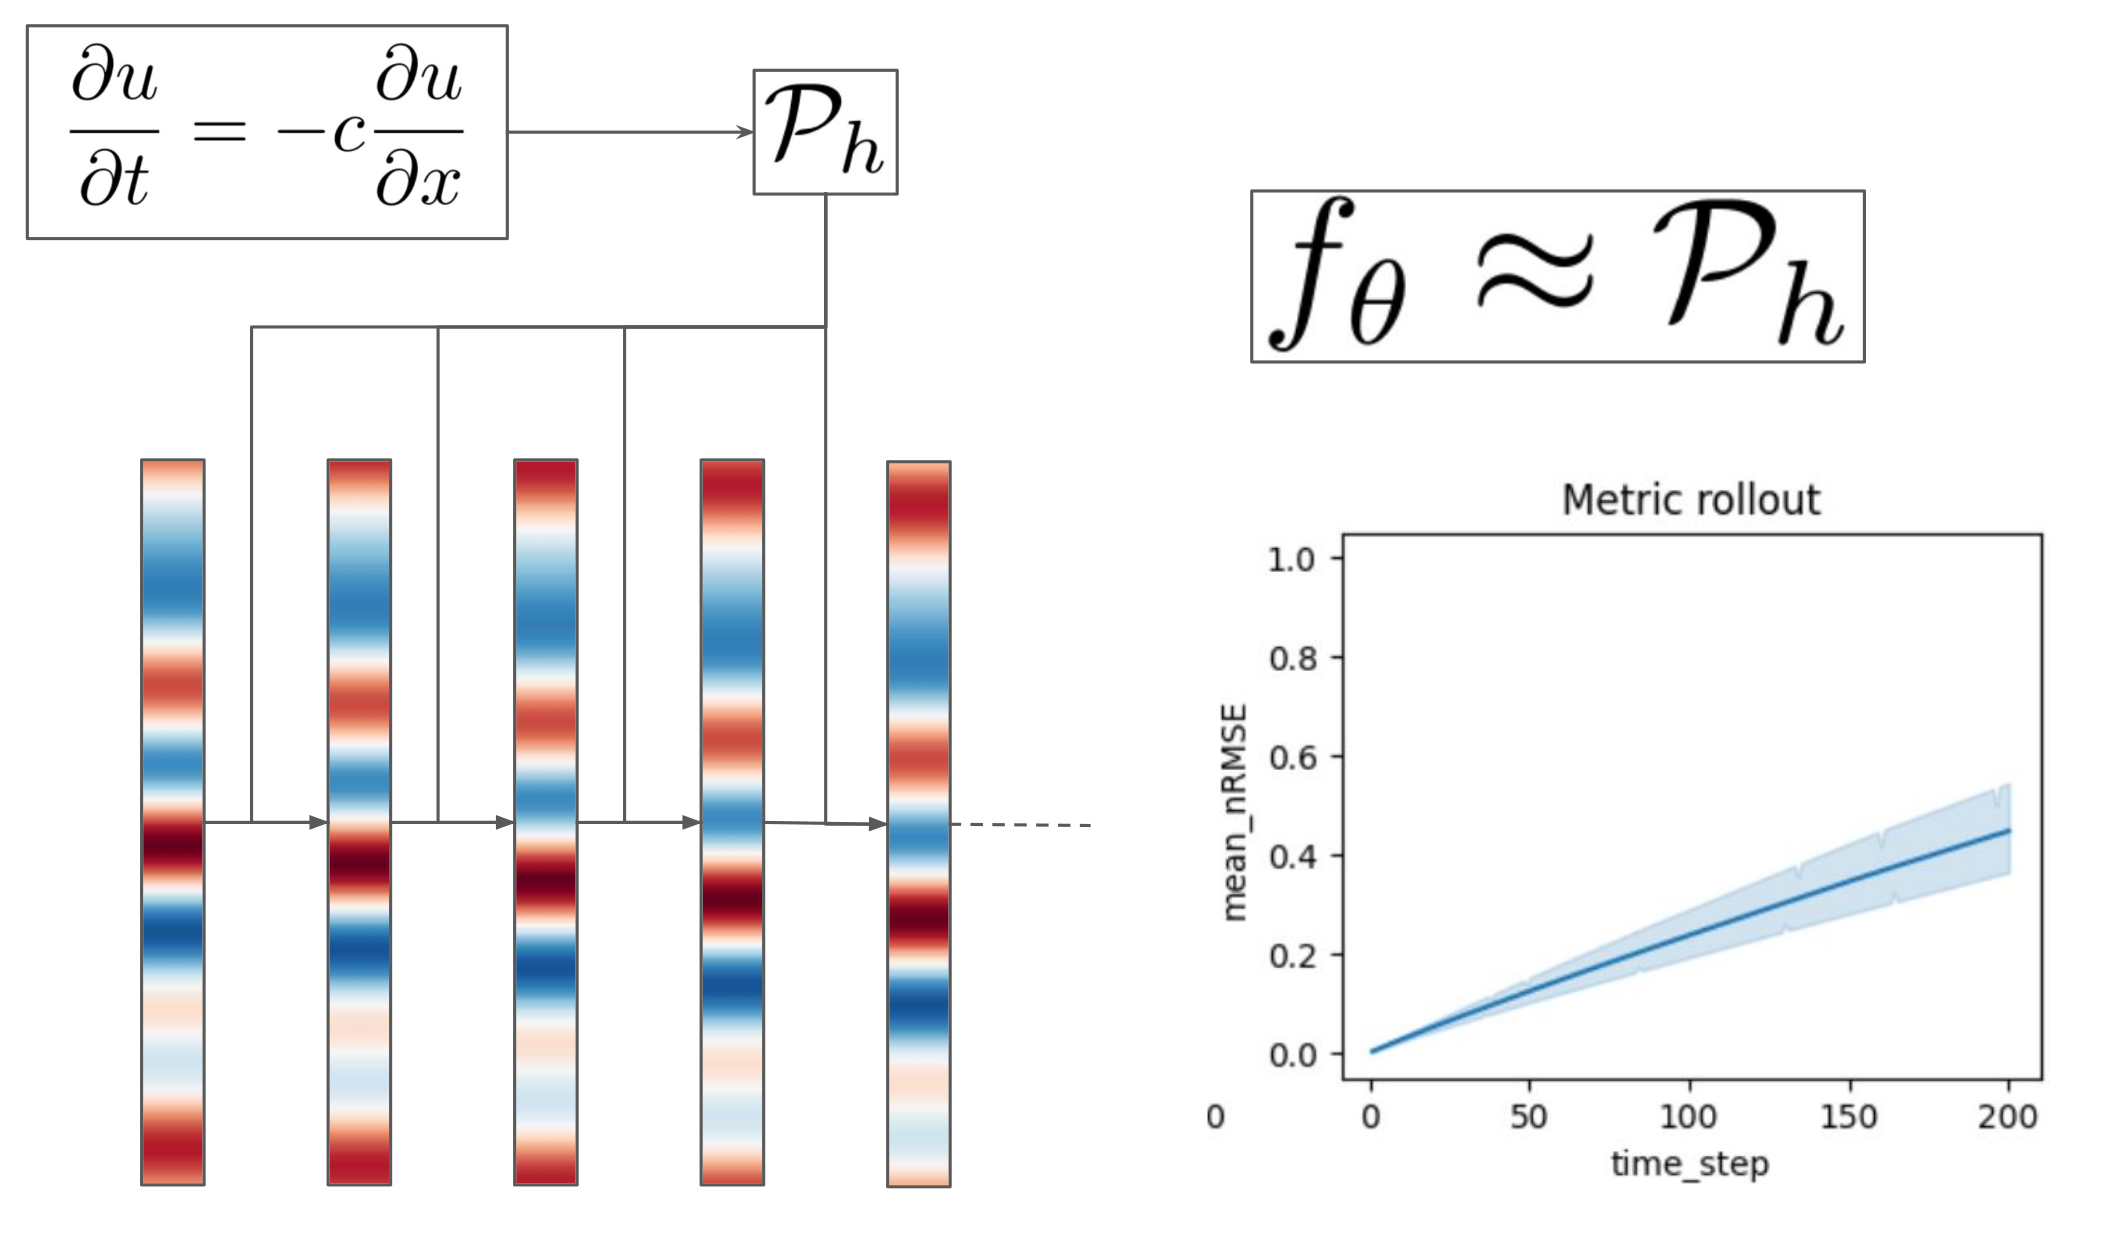

APEBench is a holistic suite to:

* procedurally generate all train and test data
* train neural emulators in various ways (and comes with many pre-implemented architectures)
* benchmarks the emulators in rollout with plenty of metrics
* do all of this for more than 46 PDEs
* many more advanced features to dive into in future videos (differentiable physics, neural-hybrid emulation, difficulty identifiers, etc.)



In [1]:
%pip install apebench

In [2]:
import apebench

advection_scenario = apebench.scenarios.difficulty.Advection()

advection_scenario

/usr/local/lib/python3.10/dist-packages/trainax/_general_trainer.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Advection(
  num_spatial_dims=1,
  num_points=160,
  num_channels=1,
  ic_config='fourier;5;true;true',
  num_warmup_steps=0,
  num_train_samples=50,
  train_temporal_horizon=50,
  train_seed=0,
  num_test_samples=30,
  test_temporal_horizon=200,
  test_seed=773,
  optim_config='adam;10_000;warmup_cosine;0.0;1e-3;2_000',
  batch_size=20,
  num_trjs_returned=1,
  record_loss_every=100,
  vlim=(-1.0, 1.0),
  report_metrics='mean_nRMSE',
  callbacks='',
  gammas=(0.0, -4.0, 0.0, 0.0, 0.0),
  coarse_proportion=0.5,
  advection_gamma=-4.0
)

In [3]:
train_trjs = advection_scenario.get_train_data()

train_trjs.shape

(50, 51, 1, 160)

Text(0, 0.5, 'Space')

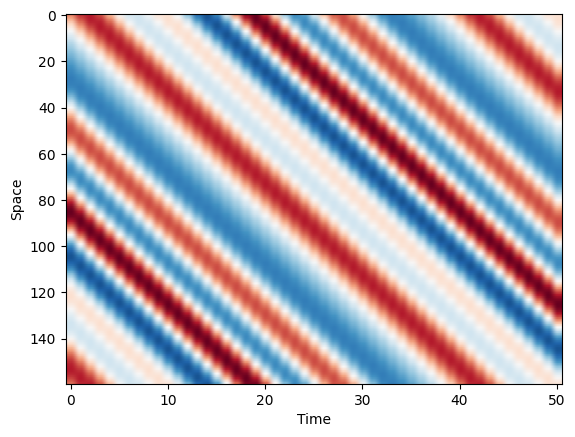

In [6]:
import matplotlib.pyplot as plt

plt.imshow(train_trjs[0, :, 0, :].T, aspect="auto", cmap="RdBu_r", vmin=-1, vmax=1)
plt.xlabel("Time")
plt.ylabel("Space")

In [7]:
data, trained_nets = advection_scenario(
    task_config="predict",
    network_config="Conv;26;10;relu",
    train_config="one",
    num_seeds=3,
)

E: 00000, B: 00000:   0%|          | 0/10000 [00:00<?, ?it/s]

In [9]:
data

,scenario,task,train,net,seed,scenario_kwargs,mean_nRMSE_0001,mean_nRMSE_0002,mean_nRMSE_0003,mean_nRMSE_0004,...,aux_009991,aux_009992,aux_009993,aux_009994,aux_009995,aux_009996,aux_009997,aux_009998,aux_009999,sample_rollout_000
0,1d_diff_adv,predict,one,Conv;26;10;relu,0,{},0.002567,0.004850,0.007127,0.009388,...,{},{},{},{},{},{},{},{},{},"[[[-0.4419727623462677, -0.2898244559764862, -..."
1,1d_diff_adv,predict,one,Conv;26;10;relu,1,{},0.003580,0.006884,0.010174,0.013441,...,{},{},{},{},{},{},{},{},{},"[[[-0.4419727623462677, -0.2898244559764862, -..."
2,1d_diff_adv,predict,one,Conv;26;10;relu,2,{},0.002920,0.005552,0.008161,0.010748,...,{},{},{},{},{},{},{},{},{},"[[[-0.4419727623462677, -0.2898244559764862, -..."


In [10]:
data_loss = apebench.melt_loss(data)

data_loss

,seed,scenario,task,net,train,scenario_kwargs,update_step,train_loss
0,0,1d_diff_adv,predict,Conv;26;10;relu,one,{},0,0.240553
1,0,1d_diff_adv,predict,Conv;26;10;relu,one,{},100,0.228105
2,0,1d_diff_adv,predict,Conv;26;10;relu,one,{},200,0.190418
3,0,1d_diff_adv,predict,Conv;26;10;relu,one,{},300,0.000280
4,0,1d_diff_adv,predict,Conv;26;10;relu,one,{},400,0.000044
...,...,...,...,...,...,...,...,...
295,2,1d_diff_adv,predict,Conv;26;10;relu,one,{},9500,0.000002
296,2,1d_diff_adv,predict,Conv;26;10;relu,one,{},9600,0.000002
297,2,1d_diff_adv,predict,Conv;26;10;relu,one,{},9700,0.000002
298,2,1d_diff_adv,predict,Conv;26;10;relu,one,{},9800,0.000002


In [11]:
import seaborn as sns

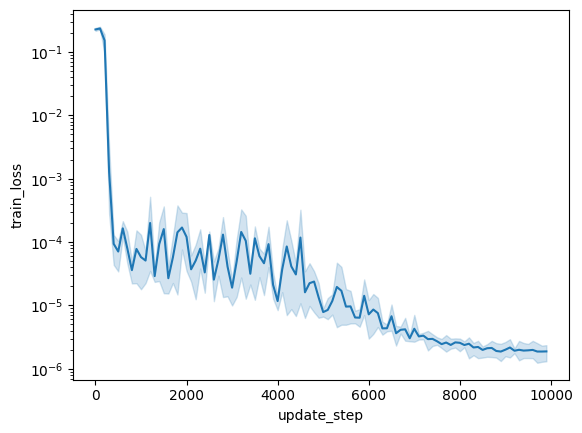

In [13]:
sns.lineplot(data_loss, x="update_step", y="train_loss")
plt.yscale("log")

In [14]:
data_metrics = apebench.melt_metrics(data)

data_metrics

,seed,scenario,task,net,train,scenario_kwargs,time_step,mean_nRMSE
0,0,1d_diff_adv,predict,Conv;26;10;relu,one,{},1,0.002567
1,0,1d_diff_adv,predict,Conv;26;10;relu,one,{},2,0.004850
2,0,1d_diff_adv,predict,Conv;26;10;relu,one,{},3,0.007127
3,0,1d_diff_adv,predict,Conv;26;10;relu,one,{},4,0.009388
4,0,1d_diff_adv,predict,Conv;26;10;relu,one,{},5,0.011628
...,...,...,...,...,...,...,...,...
595,2,1d_diff_adv,predict,Conv;26;10;relu,one,{},196,0.425318
596,2,1d_diff_adv,predict,Conv;26;10;relu,one,{},197,0.427245
597,2,1d_diff_adv,predict,Conv;26;10;relu,one,{},198,0.429172
598,2,1d_diff_adv,predict,Conv;26;10;relu,one,{},199,0.431101


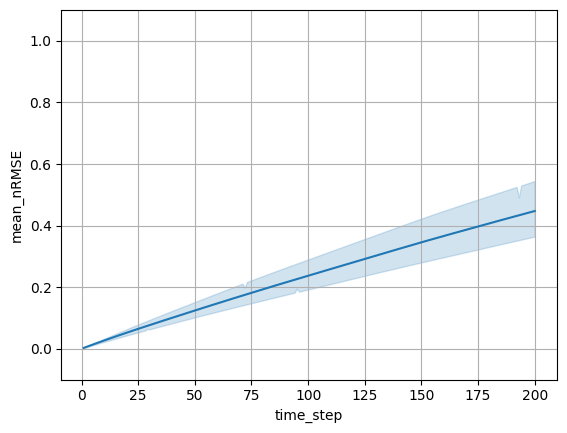

In [16]:
sns.lineplot(data_metrics, x="time_step", y="mean_nRMSE")
plt.ylim(-0.1, 1.1)
plt.grid()